<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/MetododeMonteCarloOrdinario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Monte Carlo Ornidario**
---
*Bazaldua Vera Tamara Alheli*


La idea central del método de integración Monte Carlo es la siguiente, si deseamos calcular la integral $I = \int_{a}^{b} g(x)$ para alguna función g(x) difícil de integrar analíticamente, podemos hacer la siguiente sustitución:

$ I = \int_{a}^{b} g(x)dx = \int_{a}^{b} w(x)f(x) dx $

con  $ w(x) =  g(x)(b-a) $ y $ f(x) = 1/(b-a)$ dadas de la siguiente manera

Por tanto, la integral transformada puede interpretarse como un múltiplo del valor esperado de g(x) bajo la distribución uniforme:

$ E(g(X)) = I/ (b-a) $ con $ U - unif (a,b) $

Si tomamos una muestra de números pseudoaleatorios uniformemente dis- tribuidos, digamos X1,..., XN ~ Unif(a, b), por la ley de los grandes números para N suficientemente grande tendremos que, con probabilidad 1:

$1/N ∑_{i=1}^{N} g(Xi)  -->  E(g(X))$

In [ ]:
import random

In [ ]:
import numpy as np

In [ ]:
def Met_Monte_Carlo_Or(N,a,b):
    x= random.uniform(a,b)
    valor = []
    for n in range(N):
        valor.append(x)
    return valor

In [ ]:
def g(x):
  return np.sqrt(np.arctan(x))

In [ ]:
def prom():
 x = Met_Monte_Carlo_Or(1000,0,1)
 promedio = np.mean(g(x))
 return promedio
promedio = prom()
print(promedio)

0.8401592544963439


In [ ]:
from sympy import integrate, Symbol, sqrt, atan


x = Symbol('x')

inte = integrate(sqrt(atan(x)), (x, 0, 1))


resul = inte.evalf()

# Cálculo del error
error = resul - promedio

# Impresión de resultados
print(f"Resultado de la integral: {resul:.5f}")
print(f"Error: {error:.5f}")


Resultado de la integral: 0.62982
Error: -0.21034


In [ ]:
def experimento(m):
  p=[]
  for j in range(1,m):
    aguila = prom()
    p.append(aguila)
  return  p

In [ ]:
p= experimento(1000)

<ipython-input-49-5f2c95be3a05>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


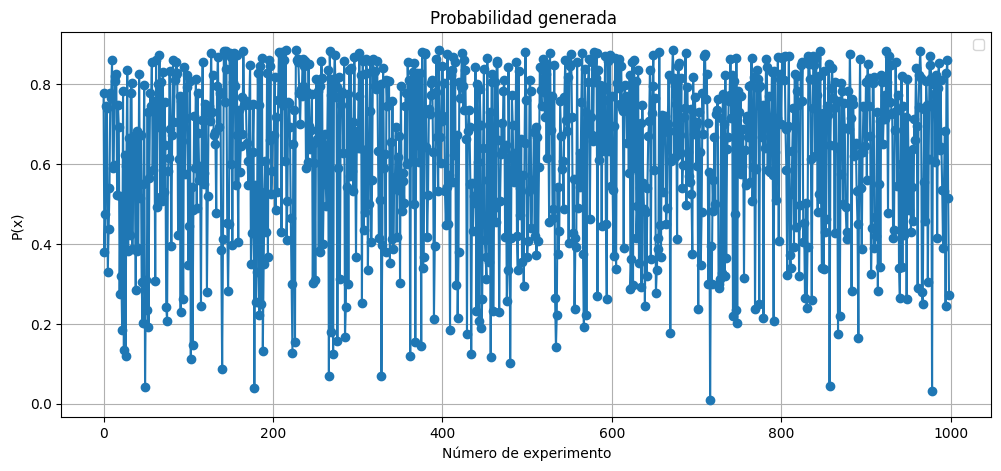

In [ ]:
from matplotlib import pyplot as plt
# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(p, marker='o', linestyle='-')
plt.title("Probabilidad generada ")
plt.xlabel("Número de experimento")
plt.ylabel("P(x)")
plt.legend()
plt.grid(True)
plt.show()